# Módulo Streamlit

## 01. Iniciando um projeto de Data Science

In [49]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [50]:
caminho_2019 = '../dados/obitos-2019.csv'
caminho_2020 = '../dados/obitos-2020.csv'

dados_2019 = pd.read_csv(caminho_2019)
dados_2020 = pd.read_csv(caminho_2020)

print(f'2019 dimensão: {dados_2019.shape}')
print(f'2020 dimensão: {dados_2020.shape}')

2019 dimensão: (12387, 6)
2020 dimensão: (14938, 6)


In [51]:
dados_2019.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,7
1,AC,OUTRAS,DOMICILIO,< 9,M,15
2,AC,OUTRAS,HOSPITAL,< 9,F,30
3,AC,OUTRAS,HOSPITAL,< 9,M,55
4,AC,OUTRAS,IGNORADO,< 9,M,1


In [52]:
dados_2020.sample(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
14806,SC,OUTRAS,VIA_PUBLICA,N/I,M,1
13064,SE,INSUFICIENCIA_RESPIRATORIA,OUTROS_SERVICOS_SAUDE,90 - 99,F,9
4538,MS,PNEUMONIA,VIA_PUBLICA,40 - 49,F,1
5250,SP,PNEUMONIA,OUTROS_SERVICOS_SAUDE,40 - 49,F,21
5275,TO,OUTRAS,HOSPITAL,40 - 49,M,75


In [53]:
len(dados_2020['uf'].unique())

27

In [54]:
dados_2020['tipo_doenca'].unique()

array(['OUTRAS', 'COVID', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG'], dtype=object)

In [55]:
# Desafio 02
obitos_por_doenca_2019 = dados_2019.groupby(['tipo_doenca'])['total'].sum()
obitos_por_doenca_2019.sort_values(ascending=False)

tipo_doenca
OUTRAS                        660927
PNEUMONIA                     226380
SEPTICEMIA                    175548
INSUFICIENCIA_RESPIRATORIA    100635
INDETERMINADA                   6990
SRAG                            1498
COVID                              1
Name: total, dtype: int64

In [56]:
# Desafio 02
obitos_por_doenca_2020 = dados_2020.groupby(['tipo_doenca'])['total'].sum()
obitos_por_doenca_2020.sort_values(ascending=False)

tipo_doenca
OUTRAS                        691305
COVID                         195959
PNEUMONIA                     182218
SEPTICEMIA                    163019
INSUFICIENCIA_RESPIRATORIA     99070
SRAG                           16576
INDETERMINADA                   9719
Name: total, dtype: int64

### Desafio 01: Acessar o portal e verificar como são classificados os dados.

- UF
- Tipo de doença
- Local de óbito
- Faixa etária
- Sexo

### Desafio 02 - Nesta aula o Thiago quer fazer uma contagem dos números de casos, mas os dados não parecem corretos. Identifique o problema antes de seguir para o próximo vídeo e ajude a corrigir (feito).

## 02. Exploração dos dados

In [57]:
proporcao = obitos_por_doenca_2020/obitos_por_doenca_2019
proporcao

tipo_doenca
COVID                         195959.000000
INDETERMINADA                      1.390415
INSUFICIENCIA_RESPIRATORIA         0.984449
OUTRAS                             1.045963
PNEUMONIA                          0.804921
SEPTICEMIA                         0.928629
SRAG                              11.065421
Name: total, dtype: float64

In [62]:
def grafico_comparativo(causa):
    total_2019 = dados_2019.groupby(['tipo_doenca'])['total'].sum()
    total_2020 = dados_2020.groupby(['tipo_doenca'])['total'].sum()
    lista = [total_2019.loc[causa], total_2020.loc[causa]]

    dados = pd.DataFrame({'Total' : lista,
                          'Ano' : [2019, 2020]})

    plt.figure(figsize=(8, 6))
    sns.barplot(x='Ano', y='Total', data=dados)
    plt.title(f'Óbitos por {causa}')
    plt.show()

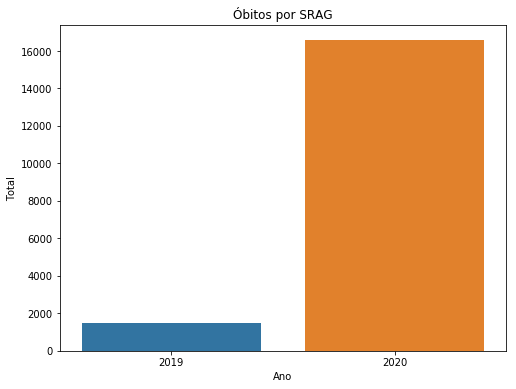

In [63]:
grafico_comparativo('SRAG')

### Desafio 01: Explorar os outros campos da base.